In [1]:
# pip install tsad


# Pipeline for the anomaly detection on the SKAB using MSET

In [2]:
# libraries importing
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from io import StringIO
import requests
from tsad.evaluating.evaluating import evaluating

## Data loading

In [3]:
def dataframe_expirement(i):
    if i == 1:
        url = "https://storage.yandexcloud.net/cloud-files-public/dataframe.csv" 
        dataframe = pd.read_csv(StringIO(requests.get(url).content.decode('utf-8')), sep='|')
        dataframe_columns = dataframe.columns 
        first_label_list = dataframe[dataframe_columns[0]].unique() 
        dataframe_aa564g = dataframe[dataframe[dataframe_columns[0]] == first_label_list[0]]
        dataframe_aa564g_first = dataframe_aa564g.drop(axis=1, labels=(dataframe_aa564g.columns[0])) \
            .drop(axis=1, labels=(dataframe_aa564g.columns[1]))[['m', 'v/v', 'v/v.1',
                                                                 'uR/h', 'ohmm', 'ohmm.1', 'ohmm.2', 'ohmm.3', 'ohmm.5',
                                                                 'ohmm.6',
                                                                 'unitless', 'unitless.1']].reset_index(drop=True)
        dataframe_edited_ = dataframe_aa564g_first.loc[dataframe_aa564g_first['unitless.1'] >= 0] \
            .loc[dataframe_aa564g_first['unitless'] >= 0].loc[dataframe_aa564g_first['ohmm'] >= 0] \
            .loc[dataframe_aa564g_first['ohmm.1'] >= 0].loc[dataframe_aa564g_first['ohmm.2'] >= 0] \
            .loc[dataframe_aa564g_first['ohmm.3'] >= 0].loc[dataframe_aa564g_first['ohmm.5'] >= 0] \
            .loc[dataframe_aa564g_first['ohmm.6'] >= 0].loc[dataframe_aa564g_first['uR/h'] >= 0] \
            .loc[dataframe_aa564g_first['v/v.1'] >= 0].loc[dataframe_aa564g_first['v/v'] >= 0] \
            .reset_index(drop=True)
    else:
        url = "https://storage.yandexcloud.net/cloud-files-public/noname_ECG_2022.csv" 
        dataframe_edited_ = pd.read_csv(StringIO(requests.get(url).content.decode('utf-8')), sep=',')
    return dataframe_edited_

In [4]:
ts_data_1, ts_data_2 = dataframe_expirement(1), dataframe_expirement(0).iloc[2500:].reset_index().drop(labels='index',axis=1)

# Data description and visualization

In [5]:
from scipy.signal import find_peaks

In [6]:
def plot_data_scores_and_selected_window(ts, score_list, window_size_selected):
    f, ax = plt.subplots(2, 1, figsize=(30, 20))
    ax[0].plot(ts)
    ax[0].vlines(x=window_size_selected, ymin=min(ts), ymax=max(ts),
        linestyle = ':',
        linewidth = 6,
        color = 'darkblue')
    ax[0].set_title("ts")
    ax[1].plot(score_list, "r")
    ax[1].set_title("score")
    f.show()

In [7]:
# dataset characteristics printing
print(f'A number of datasets: {2}\n')
print(f'Shape of the well dataset: {ts_data_1.shape}\n')
print(f'Shape of the medical dataset: {ts_data_2.shape}\n')
cp_1 = []
temp_value_second = 0
for i in range(len(ts_data_1)):
    temp_value = ts_data_1['unitless'][i]
    if temp_value != temp_value_second:
        cp_1.append(1)
    else:
        cp_1.append(0)
    temp_value_second = temp_value
cp_1[0] = 0
cp_2 = []
peaks, _ = find_peaks(ts_data_2['EcgWaveform'], distance=250)
for i in range(len(ts_data_2)):
    if i not in peaks:
        cp_2.append(0)
    else:
        cp_2.append(1)
ts_data_1['change_points'] = cp_1
ts_data_2['change_points'] = cp_2
print(f'A number of datasets: {2}\n')
print(f'Shape of the well dataset: {ts_data_1.shape}\n')
print(f'Shape of the medical dataset: {ts_data_2.shape}\n')
n_cp_1 = cp_1.count(1)
n_cp_2 = cp_2.count(1)
print(f'A number of changepoints in the well dataset: {n_cp_1}\n')
print(f'A number of changepoints in the medical dataset: {n_cp_2}\n')
print(f'Head of the well dataset:')
display(ts_data_1.head())
print(f'Head of the well dataset:')
display(ts_data_2.head())

A number of datasets: 2

Shape of the well dataset: (8754, 12)

Shape of the medical dataset: (17500, 2)

A number of datasets: 2

Shape of the well dataset: (8754, 13)

Shape of the medical dataset: (17500, 3)

A number of changepoints in the well dataset: 52

A number of changepoints in the medical dataset: 37

Head of the well dataset:


,m,v/v,v/v.1,uR/h,ohmm,ohmm.1,ohmm.2,ohmm.3,ohmm.5,ohmm.6,unitless,unitless.1,change_points
0,3185.5,0.960549,0.901756,56.50,38.11802,46.61687,26.52874,36.00038,0.126035,0.126063,5,1,0
1,3185.6,0.960549,0.924199,55.10,38.51000,41.08000,28.23000,30.61000,0.126035,0.126062,5,1,0
2,3185.7,0.960549,0.920993,55.30,38.49500,40.22613,27.25827,29.11342,0.126035,0.126062,5,1,0
3,3185.8,0.960549,0.917787,55.50,38.48000,39.39000,26.32000,27.69000,0.126035,0.126062,5,1,0
4,3185.9,0.960549,0.922435,55.21,37.06394,38.07816,28.97599,30.48858,0.126035,0.126061,5,1,0


Head of the well dataset:


,Time,EcgWaveform,change_points
0,04/08/2022 08:38:37.946,2450,0
1,04/08/2022 08:38:37.947,2447,0
2,04/08/2022 08:38:37.948,2445,0
3,04/08/2022 08:38:37.949,2442,0
4,04/08/2022 08:38:37.950,2440,0


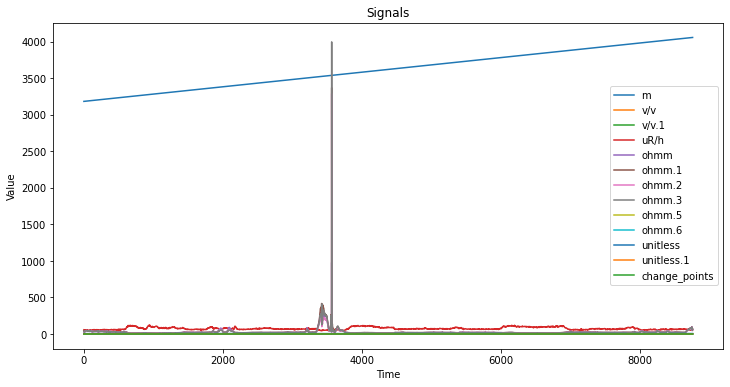

In [8]:
# well dataset visualizing
ts_data_1.plot(figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Signals')
plt.show()

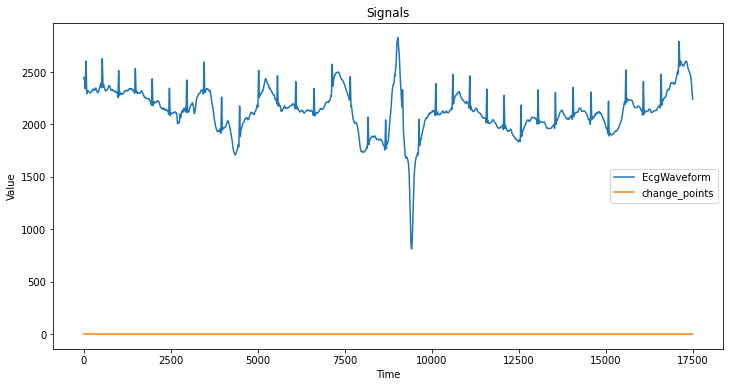

In [9]:
# medical dataset visualizing
ts_data_2.plot(figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Signals')
plt.show()

In [10]:
list_of_df = [ts_data_1[['change_points','uR/h','ohmm']], ts_data_2.drop('Time', axis=1)]

# Method applying


In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import linalg as spla
import os, sys
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [12]:
# Function for repeatability
def Random(seed_value):
    # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
    import os
    os.environ['PYTHONHASHSEED']=str(seed_value)

    # 2. Set `python` built-in pseudo-random generator at a fixed value
    import random
    random.seed(seed_value)

    # 3. Set `numpy` pseudo-random generator at a fixed value
    import numpy as np
    np.random.seed(seed_value)

    # 4. Set `tensorflow` pseudo-random generator at a fixed value
    import tensorflow as tf
    tf.random.set_seed(seed_value)

Random(10)

## Training once in the beginning

In [13]:
def kernel(x,y):

    '''
    s(x,y) = 1 - ||x-y||/(||x|| + ||y||)
    '''

    if all(x==y):
        # Handling the case of x and y both being the zero vector.
        return 1.
    else:
        return 1. - np.linalg.norm(x-y)/(np.linalg.norm(x) + np.linalg.norm(y))

def otimes(X, Y):

    m1,n = np.shape(X)
    m2,p = np.shape(Y)

    if m1!=m2:
        raise Exception('dimensionality mismatch between X and Y.')

    Z = np.zeros( (n,p) )

    if n != p:
        for i in range(n):
            for j in range(p):
                Z[i,j] = kernel(X[:,i], Y[:,j])
    else:
        for i in range(n):     
            for j in range(i, p):
                Z[i,j] = kernel(X[:,i], Y[:,j])
                Z[j,i] = Z[i,j]

    return Z

def movmean(array, window):

    n = np.size(array)
    xx = array.copy()
    y = []
    for i in range(0, window):
        y.append(np.roll(xx.tolist() + [np.nan]*window, i))
    y = np.nanmean(y, axis=0)
    l = math.ceil(window/2)

    return y[l-1:n+l-1]

class MSET:
        
    def __init__(self):
        pass
    
    def calc_W(self, X_obs):
        
        DxX_obs = otimes(self.D, X_obs)
        try:
            W = spla.lu_solve(self.LU_factors, DxX_obs)
        except:
            W = np.linalg.solve(self.DxD, DxX_obs)
    
        return W

    def fit(self, df, train_start = None, train_stop = None):
        
        self.D = df[train_start:train_stop].values.T.copy() # memory matrix
        self.SS = StandardScaler()
        self.D = self.SS.fit_transform(self.D.T).T
        
        self.DxD = otimes(self.D, self.D)
        self.LU_factors = spla.lu_factor(self.DxD)
        
    def predict(self, df):
        
        X_obs = df.values.T.copy() 
        X_obs = self.SS.transform(X_obs.T).T
#         pred = pd.DataFrame(index=df.index, columns=df.columns)
        pred = np.zeros(X_obs.T.shape)
        
        for i in range(X_obs.shape[1]):
            pred[[i],:] = (self.D @ self.calc_W(X_obs[:,i].reshape([-1,1]))).T
            
        return pd.DataFrame(self.SS.inverse_transform(pred), index=df.index, columns=df.columns)
        

In [14]:
df = list_of_df[0]
df = df.drop(['change_points'], axis=1)

In [15]:
%%time
ms = MSET()
ms.fit(df[:400])

CPU times: user 1.62 s, sys: 9.37 ms, total: 1.63 s
Wall time: 1.62 s


In [16]:
%%time
Y_pred = ms.predict(df)

CPU times: user 1min 19s, sys: 435 ms, total: 1min 20s
Wall time: 1min 26s


In [17]:
df.columns

Index(['uR/h', 'ohmm'], dtype='object')

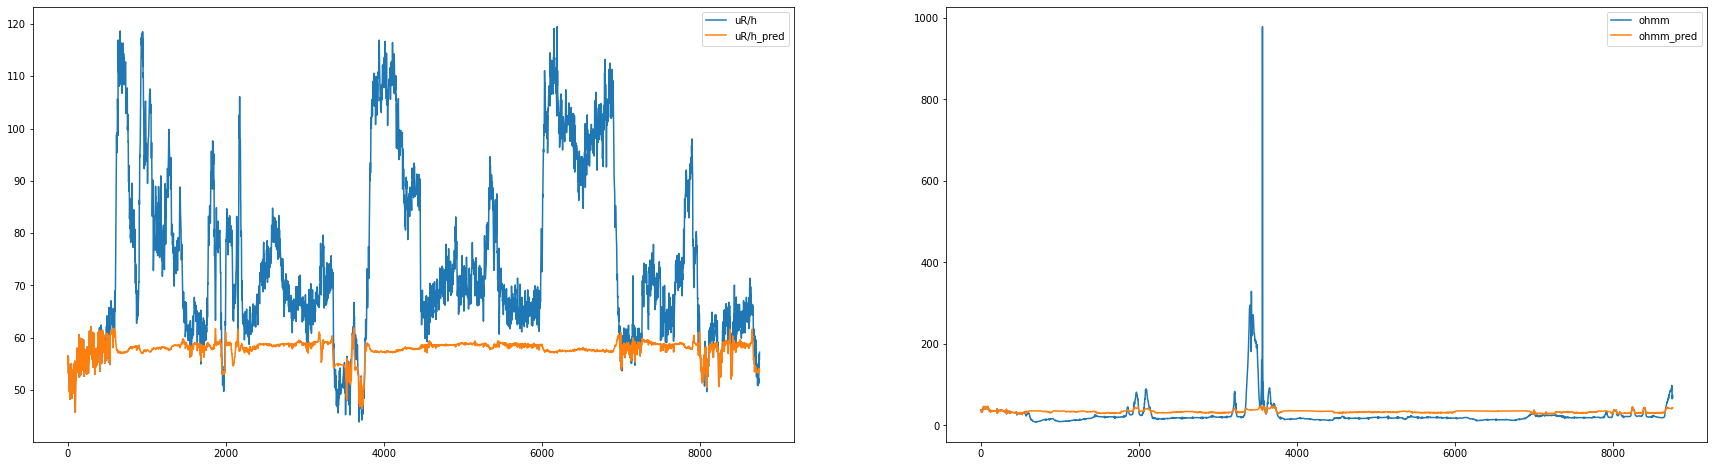

In [18]:
fig, axes = plt.subplots(df.shape[1]//2, 2, figsize=(30,8))
for i, col in enumerate(df.columns):
    ax = axes.flatten()[int(i)]
    df[col].plot(ax=ax)
    Y_pred[col].plot(ax=ax, label=f'{col}_pred')
    ax.legend()


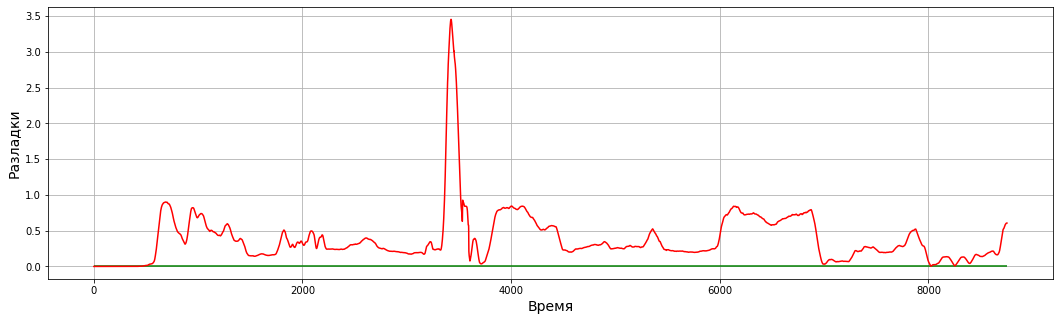

In [19]:
err = np.linalg.norm((df - Y_pred), axis=1)
rel_err = movmean(err/np.linalg.norm(Y_pred, axis=1), 
                  window=60)
UCL = 0.01
plt.figure(figsize=(18,5))
plt.plot(df.index, rel_err, c='r')
plt.hlines(UCL, df.index[0], df.index[-1], 'g')
plt.grid()
plt.xlabel('Время', fontsize=14)
plt.ylabel('Разладки', fontsize=14);

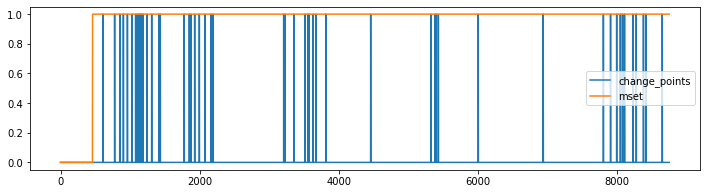

In [20]:
# plotting the labels both for outlier and changepoint detection problems
prediction = pd.DataFrame((rel_err>0.003),
                          df.index).fillna(0).any(axis=1).astype(int)
# list_of_df[0].anomaly.plot(figsize=(12,3))
list_of_df[0].change_points.plot(figsize=(12,3))
# plt.plot(t, r, label = 'mscred')
plt.plot(df.index, prediction, label = 'mset')
plt.legend()
plt.show()

## Training in the beginning of each dataset

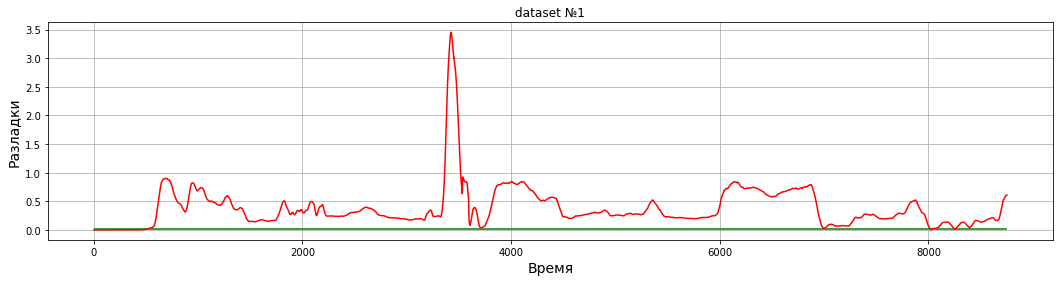

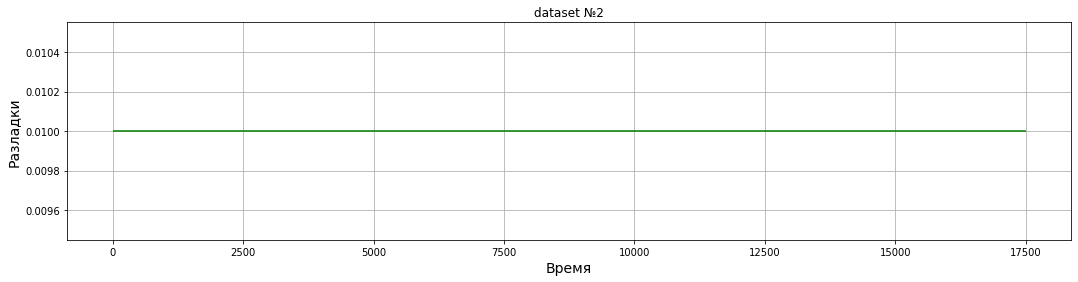

CPU times: user 3min 36s, sys: 7.97 s, total: 3min 44s
Wall time: 3min 37s


In [21]:
%%time

# inference
predicted_outlier, predicted_cp = [], []
rel_errors = []
x = 0 
for df in list_of_df:
    
    x += 1
#     print(f'dataset №{x}')
    df = df.drop(['change_points'], axis=1)
    train_stop = 400
    
    ms = MSET()
    ms.fit(df[:train_stop])
    
    # results predicting
    Y_pred = ms.predict(df)
    err = np.linalg.norm(df - Y_pred, axis=1)
    rel_err = movmean(err/np.linalg.norm(Y_pred, axis=1), 
                      window=60)
    rel_errors.append(rel_err)
    
    UCL = 0.01
    prediction = pd.DataFrame((rel_err>UCL),
                               df.index).fillna(0).any(axis=1).astype(int)
    
    # plot 
    plt.figure(figsize=(18,4))
    plt.title(f'dataset №{x}')
    plt.plot(df.index, rel_err, c='r')
    plt.hlines(UCL, df.index[0], df.index[-1], 'g')
    plt.grid()
    plt.xlabel('Время', fontsize=14)
    plt.ylabel('Разладки', fontsize=14)
    plt.show()
    
    # predicted outliers saving
    predicted_outlier.append(prediction)
    
    # predicted CPs saving
    prediction_cp = abs(prediction.diff())
    prediction_cp[0] = prediction[0]
    predicted_cp.append(prediction_cp)

# Metrics calculation

In [22]:
from datetime import datetime, timedelta

In [23]:
true_cp = [df.change_points for df in list_of_df]

In [24]:
t_0 = np.arange(len(true_cp[0])).astype('datetime64[s]')
t_1 = np.arange(len(true_cp[1])).astype('datetime64[s]')

In [25]:
df_0 = pd.DataFrame(index=t_0, columns=['predicted_cp'])
df_0['predicted_cp'] = np.array(predicted_cp[0])
df_0['true_cp'] = np.array(true_cp[0])

In [26]:
df_1 = pd.DataFrame(index=t_1, columns=['predicted_cp'])
df_1['predicted_cp'] = np.array(predicted_cp[1])
df_1['true_cp'] = np.array(true_cp[1])

In [27]:
# nab metric calculation
nab = evaluating(df_0['true_cp'], df_0['predicted_cp'], metric='nab', numenta_time='30 sec')

Intersection of scoring windows(Timestamp('1970-01-01 00:18:00'), Timestamp('1970-01-01 00:17:54'))
Intersection of scoring windows(Timestamp('1970-01-01 00:18:24'), Timestamp('1970-01-01 00:18:16'))
Intersection of scoring windows(Timestamp('1970-01-01 00:18:46'), Timestamp('1970-01-01 00:18:31'))
Intersection of scoring windows(Timestamp('1970-01-01 00:19:01'), Timestamp('1970-01-01 00:18:45'))
Intersection of scoring windows(Timestamp('1970-01-01 00:19:15'), Timestamp('1970-01-01 00:19:01'))
Intersection of scoring windows(Timestamp('1970-01-01 00:19:31'), Timestamp('1970-01-01 00:19:13'))
Intersection of scoring windows(Timestamp('1970-01-01 00:23:33'), Timestamp('1970-01-01 00:23:25'))
Intersection of scoring windows(Timestamp('1970-01-01 00:30:52'), Timestamp('1970-01-01 00:30:47'))
Intersection of scoring windows(Timestamp('1970-01-01 00:36:01'), Timestamp('1970-01-01 00:36:01'))
Intersection of scoring windows(Timestamp('1970-01-01 00:53:29'), Timestamp('1970-01-01 00:53:17'))


In [28]:
# average detection delay metric calculation
add = evaluating(df_0['true_cp'], df_0['predicted_cp'], metric='average_time', numenta_time='30 sec')

Intersection of scoring windows(Timestamp('1970-01-01 00:18:00'), Timestamp('1970-01-01 00:17:54'))
Intersection of scoring windows(Timestamp('1970-01-01 00:18:24'), Timestamp('1970-01-01 00:18:16'))
Intersection of scoring windows(Timestamp('1970-01-01 00:18:46'), Timestamp('1970-01-01 00:18:31'))
Intersection of scoring windows(Timestamp('1970-01-01 00:19:01'), Timestamp('1970-01-01 00:18:45'))
Intersection of scoring windows(Timestamp('1970-01-01 00:19:15'), Timestamp('1970-01-01 00:19:01'))
Intersection of scoring windows(Timestamp('1970-01-01 00:19:31'), Timestamp('1970-01-01 00:19:13'))
Intersection of scoring windows(Timestamp('1970-01-01 00:23:33'), Timestamp('1970-01-01 00:23:25'))
Intersection of scoring windows(Timestamp('1970-01-01 00:30:52'), Timestamp('1970-01-01 00:30:47'))
Intersection of scoring windows(Timestamp('1970-01-01 00:36:01'), Timestamp('1970-01-01 00:36:01'))
Intersection of scoring windows(Timestamp('1970-01-01 00:53:29'), Timestamp('1970-01-01 00:53:17'))


In [29]:
# nab metric calculation
nab = evaluating(df_1['true_cp'], df_1['predicted_cp'], metric='nab', numenta_time='30 sec')

Standart  -  0.0
LowFP  -  0.0
LowFN  -  0.0


In [30]:
# average detection delay metric calculation
add = evaluating(df_1['true_cp'], df_1['predicted_cp'], metric='average_time', numenta_time='30 sec')

Amount of true anomalies 37
A number of missed CPs = 37
A number of FPs = 0
Average time nan
